In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

32068


In [2]:
# Required plotting setting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

In [3]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'
print(postanalysis_folder)
figure_folder = os.path.join(postanalysis_folder, 'Figures_0817')
print(figure_folder)

comp_figure_folder = os.path.join(figure_folder, 'AB_compartment')

if not os.path.exists(comp_figure_folder):
    print(f"Create: {comp_figure_folder}")
    os.makedirs(comp_figure_folder)
else:
    print(f"Use: {comp_figure_folder}")
median_figure_folder = os.path.join(figure_folder, 'Median_distmap')

if not os.path.exists(median_figure_folder):
    print(f"Create: {median_figure_folder}")
    os.makedirs(median_figure_folder)
else:
    print(f"Use: {median_figure_folder}")

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis
\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817
Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\AB_compartment
Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\Median_distmap


## load codebook

In [5]:
import pandas as pd
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')
sort_by_region = False
from ImageAnalysis3.structure_tools import distance

chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook, codebook, sort_by_region=sort_by_region)

In [6]:
class_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'class_2_chr2Zxys.pkl')
class_2_chr2ZxysList = pickle.load(open(class_2_chr2Zxys_filename, 'rb'))

In [7]:
for _cls in class_2_chr2ZxysList:
    print(_cls, len(class_2_chr2ZxysList[_cls]))

Gluta 13719
GABA 4966
Astro 3822
Endo 2891
Micro 1523
Oligo 6333


In [8]:
class_2_median_filename = os.path.join(postanalysis_folder, 'class_2_medianDict.pkl')
print(class_2_median_filename)

if os.path.exists(class_2_median_filename):
    print("Loading")
    class_2_medianDict = np.load(class_2_median_filename, allow_pickle=True)
else:
    from ImageAnalysis3.structure_tools.distance import Chr2ZxysList_2_summaryDist_by_key,Chr2ZxysList_2_summaryDict
    # calculate prob
    class_2_medianDict = {}
    for _class in class_2_chr2ZxysList:
        class_2_medianDict[_class] = Chr2ZxysList_2_summaryDict(
            class_2_chr2ZxysList[_class], 
            total_codebook=codebook, 
            num_threads=44, verbose=True)
    
    print(f"Saving to: {class_2_median_filename}")
    pickle.dump(class_2_medianDict, open(class_2_median_filename, 'wb'))

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\class_2_medianDict.pkl
-- preparing chr_2_zxys from 13719 cells in 5.839s.
-- summarize 231 inter-chr distances with 44 threads in 286.178s.
-- preparing chr_2_zxys from 4966 cells in 2.932s.
-- summarize 231 inter-chr distances with 44 threads in 108.412s.
-- preparing chr_2_zxys from 3822 cells in 1.823s.
-- summarize 231 inter-chr distances with 44 threads in 77.338s.
-- preparing chr_2_zxys from 2891 cells in 1.452s.
-- summarize 231 inter-chr distances with 44 threads in 67.186s.
-- preparing chr_2_zxys from 1523 cells in 0.740s.
-- summarize 231 inter-chr distances with 44 threads in 48.238s.
-- preparing chr_2_zxys from 6333 cells in 3.380s.
-- summarize 231 inter-chr distances with 44 threads in 226.103s.
Saving to: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\class_2_medianDict.pkl


<IPython.core.display.Javascript object>


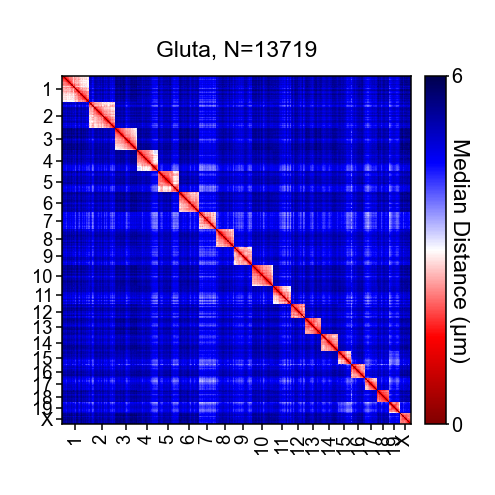

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


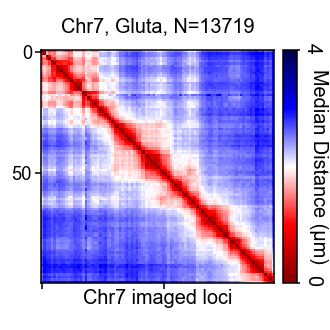

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


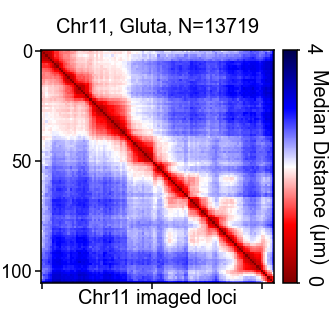

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


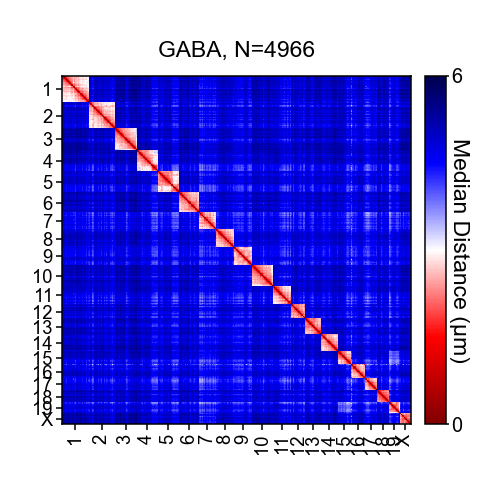

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


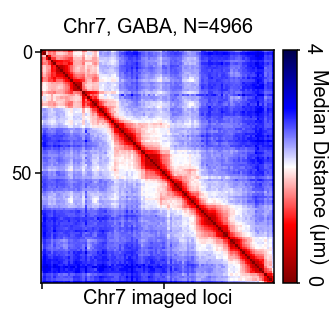

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


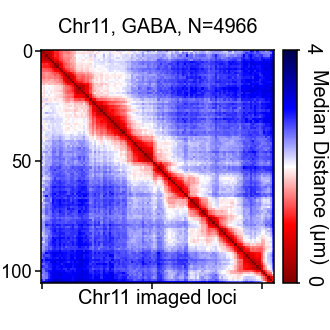

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


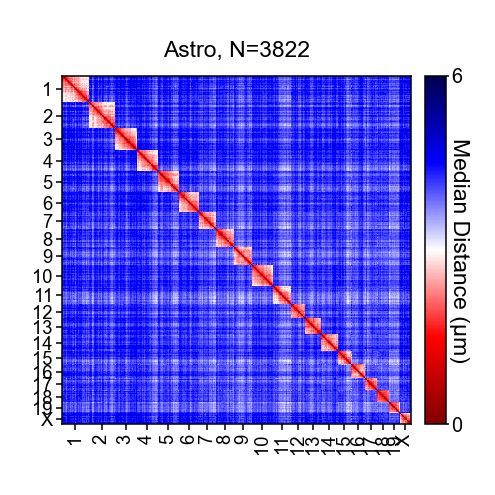

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


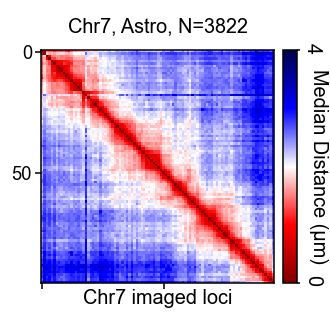

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


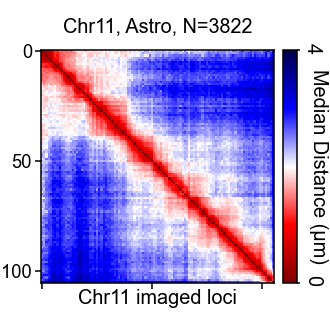

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


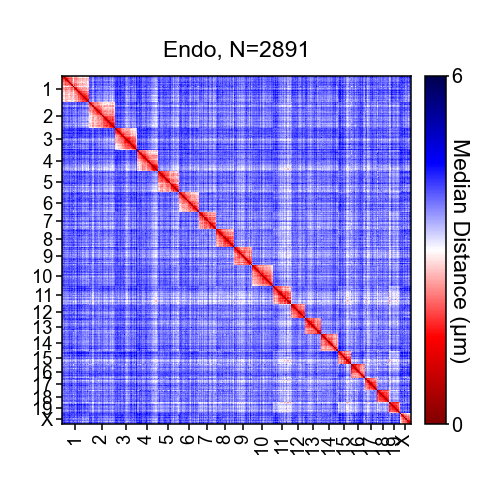

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


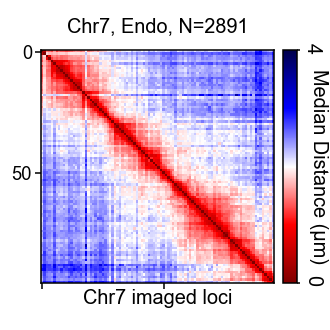

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


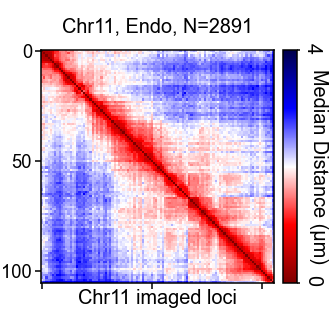

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


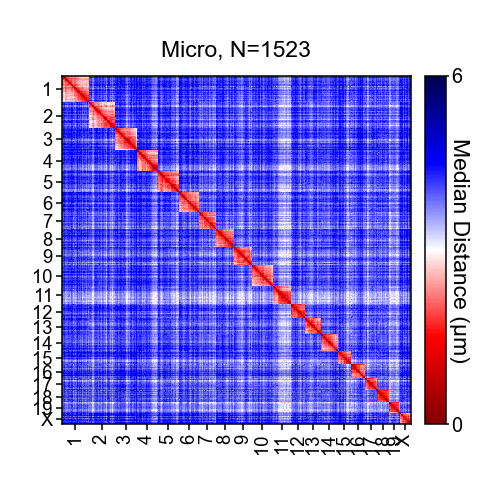

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


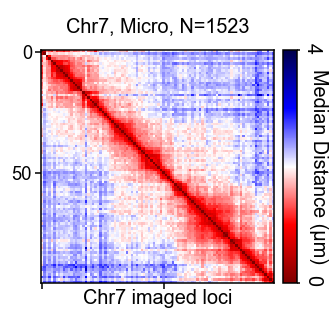

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


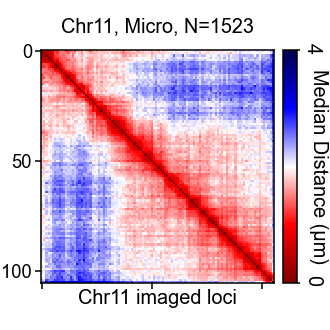

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


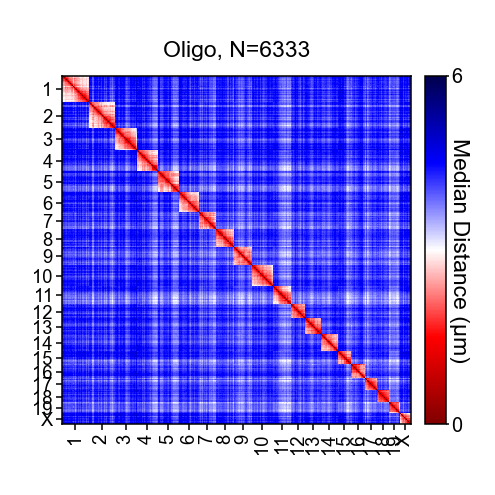

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


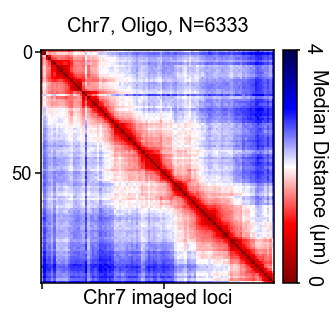

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>


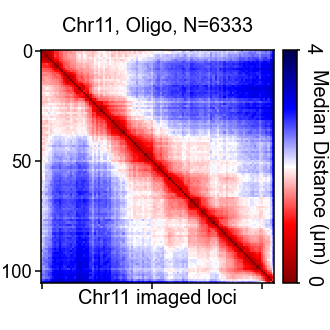

meta NOT subset; don't know how to subset; dropped


In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plot_chrs = ['7', '11']
#sel_classes = ['Astro', 'Oligo', 'L2/3 IT']
sel_classes = [_cls for _cls in class_2_medianDict.keys() if _cls not in ['other']]
for _cls in sel_classes:
    _median_mat, _chr_edges, _chr_names = distance.assemble_ChrDistDict_2_Matrix(
        class_2_medianDict[_cls], codebook, use_cis=True, use_trans=False, sort_by_region=False)
    
    
    fig, ax1 = plt.subplots(figsize=(_single_col_width,_single_col_width), dpi=200)

    # create a color map
    median_cmap = cm.get_cmap('seismic_r').copy()
    median_cmap.set_bad(color=[0.5,0.5,0.5,1])

    vmin,vmax = 0,6

    _pf = ax1.imshow(_median_mat, 
                     cmap=median_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

    ax1.set_title(f"{_cls}, N={len(class_2_chr2ZxysList[_cls])}", fontsize=_font_size)
    ax1.set_yticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
    ax1.set_yticklabels(_chr_names[:-1],)
    ax1.set_xticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
    ax1.set_xticklabels(_chr_names[:-1], rotation=90)

    #ax1.hlines(_chr_edges-0.5, 0, len(_median_mat), color='yellow', linewidth=0.2)
    #ax1.vlines(_chr_edges-0.5, 0, len(_median_mat), color='yellow', linewidth=0.2)
    ax1.xaxis.set_tick_params(which='both', labelbottom=True)
    ax1.yaxis.set_tick_params(which='both', labelleft=True)
    ax1.set_xlim([0, len(_median_mat)])
    ax1.set_ylim([len(_median_mat), 0])

    ax1.tick_params('both', labelsize=_font_size-1.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=1, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

    # locate ax1
    divider = make_axes_locatable(ax1)
    # colorbar ax
    cax = divider.append_axes('right', size='6%', pad="4%")
    cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
    cbar.ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size-1,
                    pad=1, labelleft=False) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

    cbar.set_ticks([vmin,vmax])
    cbar.outline.set_linewidth(_ticklabel_width)
    cbar.set_label('Median Distance (\u03BCm)', 
                   fontsize=_font_size, labelpad=2, rotation=270)
    cbar.ax.minorticks_off()

    plt.savefig(os.path.join(median_figure_folder, 
                             f"trans_median_major_{_cls.replace(r'/','_').replace(' ', '_')}.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()
    
    
    # sel_chr
    for sel_chr in plot_chrs:

        fig, ax1 = plt.subplots(figsize=(1.5,1.5), dpi=200)

        # create a color map
        median_cmap = cm.get_cmap('seismic_r').copy()
        median_cmap.set_bad(color=[0.5,0.5,0.5,1])

        vmin,vmax = 0,4

        _pf = ax1.imshow(class_2_medianDict[_cls][f"cis_{sel_chr}"], 
                         cmap=median_cmap, vmin=vmin, vmax=vmax, interpolation='nearest')

        ax1.set_title(f"Chr{sel_chr}, {_cls}, N={len(class_2_chr2ZxysList[_cls])}", fontsize=_font_size-1)
        ax1.set_xlabel(f"Chr{sel_chr} imaged loci", fontsize=_font_size-1, labelpad=2)
        ax1.set_yticks(np.arange(0, len(chr_2_orders[sel_chr]), 50))
        #ax1.set_yticklabels(_chr_names[:-1],)
        ax1.set_xticks( np.arange(0, len(chr_2_orders[sel_chr]), 50))
        #ax1.set_xticklabels(_chr_names[:-1], rotation=45)

        ax1.xaxis.set_tick_params(which='both', labelbottom=True)
        ax1.yaxis.set_tick_params(which='both', labelleft=True)
        ax1.set_xlim([-0.5, len(chr_2_orders[sel_chr])-0.5])
        ax1.set_ylim([len(chr_2_orders[sel_chr])-0.5, -0.5])

        ax1.tick_params('both', labelsize=_font_size-1.5, 
                        width=_ticklabel_width, length=_ticklabel_size,
                        pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
        [i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

        # locate ax1
        divider = make_axes_locatable(ax1)
        # colorbar ax
        cax = divider.append_axes('right', size='6%', pad="4%")
        cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
        cbar.ax.tick_params('both', labelsize=_font_size-1, 
                        width=_ticklabel_width, length=_ticklabel_size-1,
                        pad=1, labelleft=False) # remove bottom ticklabels for ax1
        [i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

        cbar.set_ticks([vmin,vmax])
        cbar.ax.set_yticklabels([vmin,vmax], rotation=270)
        cbar.outline.set_linewidth(_ticklabel_width)
        cbar.set_label('Median Distance (\u03BCm)', 
                       fontsize=_font_size-1, labelpad=2, rotation=270)
        cbar.ax.minorticks_off()
        plt.savefig(os.path.join(median_figure_folder, 
                                 f"cis_median_major_{_cls.replace(r'/','_').replace(' ', '_')}_{sel_chr}.png"),
                    transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)                    
        plt.savefig(os.path.join(median_figure_folder, 
                                 f"cis_median_major_{_cls.replace(r'/','_').replace(' ', '_')}_{sel_chr}.pdf"),
                    transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
        plt.show()
    
    #break
    

In [23]:
plt.close('all')